# Topic Modeling wiht Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a method for reducing the dimnesionality of documents treated as a bag of words. It is used for document classification, clustering and retrieval. For example, LSA can be used to search for prior art given a new patent application. In this homework, we will implement a small library for simple latent semantic analysis as a practical example of the application of SVD. The ideas are very similar to PCA.

We will implement a toy example of LSA to get familiar with the ideas. If you want to use LSA or similar methods for statiscal language analyis, the most efficient Python library is probably [gensim](https://radimrehurek.com/gensim/) - this also provides an online algorithm - i.e. the training information can be continuously updated. Other useful functions for processing natural language can be found in the [Natural Lnaguage Toolkit](http://www.nltk.org/).

**Note**: The SVD from scipy.linalg performs a full decomposition, which is inefficient since we only need to decompose until we get the first k singluar values. If the SVD from `scipy.linalg` is too slow, please use the `sparsesvd` function from the [sparsesvd](https://pypi.python.org/pypi/sparsesvd/) package to perform SVD instead.  You can install in the usual way with 
```
!pip install sparsesvd
```

Then import the following
```python
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix 
```

and use as follows
```python
sparsesvd(csc_matrix(M), k=10)
```

**Exercise 1 (20 points)**.  Calculating pairwise distance matrices.

Suppose we want to construct a distance matrix between the rows of a matrix. For example, given the matrix 

```python
M = np.array([[1,2,3],[4,5,6]])
```

the distance matrix using Euclidean distance as the measure would be
```python
[[ 0.000  1.414  2.828]
 [ 1.414  0.000  1.414]
 [ 2.828  1.414  0.000]] 
```
if $M$ was a collection of column vectors.

Write a function to calculate the pairwise-distance matrix given the matrix $M$ and some arbitrary distance function. Your functions should have the following signature:
```
def func_name(M, distance_func):
    pass
```

0. Write a distance function for the Euclidean, squared Euclidean and cosine measures.
1. Write the function using looping for M as a collection of row vectors.
2. Write the function using looping for M as a collection of column vectors.
3. Wrtie the function using broadcasting for M as a colleciton of row vectors.
4. Write the function using broadcasting for M as a colleciton of column vectors. 

For 3 and 4, try to avoid using transposition (but if you get stuck, there will be no penalty for using transpoition). Check that all four functions give the same result when applied to the given matrix $M$.

In [1]:
import numpy as np
M = np.array([[1,2,3],[4,5,6]])

## Euclidean Distance 
def Euclidean(A,B):
    """Function that returns the Euclidean Distance """
    count=0
    for i in range(len(A)):
        count+= (A[i]-B[i])**2
    return count ** 0.5
        
## Squared Euclidean Distance
def Squared_Euclidean(A,B):
    """Function that returns the Squared Euclidean Distance """
    count=0
    for i in range(len(A)):
        count+= (A[i]-B[i])**2
    return count

## Cosine Distance
def Cosine(A, B):
    """Function that Returns Cosine Distance"""
    return 1 - (A* B).sum(0)/(np.sqrt((A**2).sum(0)) * np.sqrt((B**2).sum(0)))


In [2]:
#Write the function using looping for M as a collection of row vectors.
def pairwise_dist_row(Matrix, distance_func):
    """Returns matrix of pairwise row distances using loops."""
    n = len(Matrix)
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            m[i, j]=distance_func(Matrix[i,:],Matrix[j,:])
    
    return m

print(pairwise_dist_row(M, Euclidean))
print(pairwise_dist_row(M, Squared_Euclidean))
print(pairwise_dist_row(M, Cosine))

[[ 0.          5.19615242]
 [ 5.19615242  0.        ]]
[[  0.  27.]
 [ 27.   0.]]
[[  0.00000000e+00   2.53681538e-02]
 [  2.53681538e-02   2.22044605e-16]]


In [3]:
## Write the function using looping for M as a collection of column vectors.
def pairwise_dist_col(Matrix, distance_func):
    """Returns matrix of pairwise row distances using loops."""
    n = Matrix.shape[1]
    m = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            m[i, j]=distance_func(Matrix[:,i],Matrix[:,j])
    return m

print(pairwise_dist_col(M, Euclidean))
print(pairwise_dist_col(M, Squared_Euclidean))
print(pairwise_dist_col(M, Cosine))


[[ 0.          1.41421356  2.82842712]
 [ 1.41421356  0.          1.41421356]
 [ 2.82842712  1.41421356  0.        ]]
[[ 0.  2.  8.]
 [ 2.  0.  2.]
 [ 8.  2.  0.]]
[[  0.00000000e+00   9.16983196e-03   2.38129398e-02]
 [  9.16983196e-03  -2.22044605e-16   3.45424176e-03]
 [  2.38129398e-02   3.45424176e-03   1.11022302e-16]]


In [4]:
## Wrtie the function using broadcasting for M as a colleciton of row vectors.
def pairwise_dist_row2(M, distance_func):
    '''Returns matrix of pairwise row distances using broadcasting.'''
    return distance_func(M.T[:,None,:],M.T[:,:,None])

print(pairwise_dist_row2(M, Euclidean))
print(pairwise_dist_row2(M, Squared_Euclidean))
print(pairwise_dist_row2(M, Cosine))

[[ 0.          5.19615242]
 [ 5.19615242  0.        ]]
[[ 0 27]
 [27  0]]
[[  0.00000000e+00   2.53681538e-02]
 [  2.53681538e-02   2.22044605e-16]]


In [5]:
#Wrtie the function using broadcasting for M as a colleciton of col vectors.
def pairwise_dist_col2(M, distance_func):
    '''Returns matrix of pairwise col distances using broadcasting.'''
    return distance_func(M[:,None,:],M[:,:,None])

print(pairwise_dist_col2(M, Euclidean))
print(pairwise_dist_col2(M, Squared_Euclidean))
print(pairwise_dist_col2(M, Cosine))


[[ 0.          1.41421356  2.82842712]
 [ 1.41421356  0.          1.41421356]
 [ 2.82842712  1.41421356  0.        ]]
[[0 2 8]
 [2 0 2]
 [8 2 0]]
[[  0.00000000e+00   9.16983196e-03   2.38129398e-02]
 [  9.16983196e-03  -2.22044605e-16   3.45424176e-03]
 [  2.38129398e-02   3.45424176e-03   1.11022302e-16]]


In [6]:
## Make sure both broadcasting and loops return the same results
from numpy.testing import assert_almost_equal

assert_almost_equal(pairwise_dist_col(M, Euclidean), pairwise_dist_col2(M, Euclidean))
assert_almost_equal(pairwise_dist_row2(M, Euclidean), pairwise_dist_row(M, Euclidean))

**Exercise 2 (20 points)**. Write 3 functions to calculate the term frequency (tf), the inverse document frequency (idf) and the product (tf-idf). Each function should take a single argument `docs`, which is a dictionary of (key=identifier, value=dcoument text) pairs, and return an appropriately sized array. Convert '-' to ' ' (space), remove punctuation, convert text to lowercase and split on whitespace to generate a collection of terms from the dcoument text.

- tf = the number of occurrences of term $i$ in document $j$
- idf = $\log \frac{n}{1 + \text{df}_i}$ where $n$ is the total number of documents and $\text{df}_i$ is the number of documents in which term $i$ occurs.

Print the table of tf-idf values for the following document collection

```
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}
```

In [7]:
s1 = "The quick brown fox"
s2 = "Brown fox jumps over the jumps jumps jumps"
s3 = "The the the lazy dog elephant."
s4 = "The the the the the dog peacock lion tiger elephant"

docs = {'s1': s1, 's2': s2, 's3': s3, 's4': s4}

In [8]:
#Function to count the inverse frequency 
from collections import Counter
from string import punctuation
import pandas as pd

def tf(docs):
    """Returns a dataframe with the term frequency for each document in a collection of documents"""
    
    #create dataframe from the term frequences of each documents 
    data_frame = pd.DataFrame({a: each_document_tf(b) for a, b in docs.items()})
    
    #replace the NAs with 0
    data_frame.fillna(0, inplace=True)
    
    #return the data frame
    return data_frame

def each_document_tf(doc):
    "Return dictinary of term frequency of a single document"
    
    #initiailize dictionary 
    d={}
    
    #lower case and replace '-'
    words = doc.lower().replace('-', ' ')
    
    #get rid of punctuation
    for item in punctuation:
        if item in words:
            words=words.replace(item,"")
    #split into words
    words=words.split()
    
    #Count the words 
    for word in words:
        d[word]=d.get(word, 0)+1  
        
    #return the dictionary for the document 
    return d




In [9]:
tf(docs)

,s1,s2,s3,s4
brown,1.0,1.0,0.0,0.0
dog,0.0,0.0,1.0,1.0
elephant,0.0,0.0,1.0,1.0
fox,1.0,1.0,0.0,0.0
jumps,0.0,4.0,0.0,0.0
lazy,0.0,0.0,1.0,0.0
lion,0.0,0.0,0.0,1.0
over,0.0,1.0,0.0,0.0
peacock,0.0,0.0,0.0,1.0
quick,1.0,0.0,0.0,0.0


In [10]:
#function for inverse term frequency 
import numpy as np
from __future__ import division

def idf(docs):
    '''Calculate the inverse term frequency for a collection of documents '''
    #call the term frequency function 
    term_freq=tf(docs)
    
    #count the number of documents 
    n=term_freq.shape[1]
    
    #create the dataframe of inverse term frequencies 
    sums=np.log(n/(np.sum(term_freq>0,axis=1)+1))

    new_data=pd.DataFrame(sums)
    new_data.columns=["idf"]
    
    #return the new dataframe 
    return new_data

In [11]:
idf(docs)

,idf
brown,0.287682
dog,0.287682
elephant,0.287682
fox,0.287682
jumps,0.693147
lazy,0.693147
lion,0.693147
over,0.693147
peacock,0.693147
quick,0.693147


In [12]:
def tf_idf(docs):
    """Function that returns a dataframe of the product of tf and idf for a collection of documents"""
    #call the two functions previous written
    term_freq=tf(docs)
    idf_data=idf(docs)
    #return them multiplied together and transposed 
    new=pd.DataFrame((np.array(term_freq) * np.array(idf_data)))
    new.index = idf_data.index
    return new

In [13]:
tf_idf(docs)

,0,1,2,3
brown,0.287682,0.287682,0.000000,0.000000
dog,0.000000,0.000000,0.287682,0.287682
elephant,0.000000,0.000000,0.287682,0.287682
fox,0.287682,0.287682,0.000000,0.000000
jumps,0.000000,2.772589,0.000000,0.000000
lazy,0.000000,0.000000,0.693147,0.000000
lion,0.000000,0.000000,0.000000,0.693147
over,0.000000,0.693147,0.000000,0.000000
peacock,0.000000,0.000000,0.000000,0.693147
quick,0.693147,0.000000,0.000000,0.000000


**Exercise 3 (20 points)**. 

1. Write a function that takes a matrix $M$ and an integer $k$ as arguments, and reconstructs a reduced matrix using only the $k$ largest singular values. Use the `scipy.linagl.svd` function to perform the decomposition. This is the least squares approximation to the matrix $M$ in $k$ dimensions.

2. Apply the function you just wrote to the following term-frequency matrix for a set of $9$ documents using $k=2$ and print the reconstructed matrix $M'$.
```
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1]])
```

3. Calculate the pairwise correlation matrix for the original matrix M and the reconstructed matrix using $k=2$ singular values (you may use [scipy.stats.spearmanr](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) to do the calculations). Consider the fist 5 sets of documents as one group $G1$ and the last 4 as another group $G2$ (i.e. first 5 and last 4 columns). What is the average within group correlation for $G1$, $G2$ and the average cross-group correlation for G1-G2 using either $M$ or $M'$. (Do not include self-correlation in the within-group calculations.).

In [14]:
from scipy import linalg 
import numpy as np 

def matrix_reconstruc(M,k):
    '''Function to reconstruct a reduced matrix using only the first k singular values. Svd decomposition.'''
    U, s, Vh=linalg.svd(M,full_matrices=False)
    
    #replace singular values beyond k with 0
    s[k:]=0
    
    #reconstruct and return the matrix 
    return U @ (np.diag(s) @ Vh)
    
    

In [15]:
M = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 2, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 1]])


#Apply the function and print the reconstructed matrix
M_prime=matrix_reconstruc(M,2)
print(matrix_reconstruc(M,2))

[[ 0.16205797  0.40049828  0.37895454  0.46756626  0.17595367 -0.05265495
  -0.11514284 -0.15910198 -0.09183827]
 [ 0.14058529  0.36980077  0.32899603  0.40042722  0.16497247 -0.03281545
  -0.07056857 -0.09676827 -0.04298073]
 [ 0.15244948  0.50500444  0.35793658  0.41010678  0.23623173  0.02421652
   0.05978051  0.0868573   0.12396632]
 [ 0.25804933  0.84112343  0.60571995  0.69735717  0.39231795  0.03311801
   0.08324491  0.12177239  0.18737973]
 [ 0.44878975  1.23436483  1.0508615   1.26579559  0.55633139 -0.07378998
  -0.15469383 -0.20959816 -0.04887954]
 [ 0.15955428  0.5816819   0.37521897  0.41689768  0.27654052  0.05590374
   0.1322185   0.18891146  0.21690761]
 [ 0.15955428  0.5816819   0.37521897  0.41689768  0.27654052  0.05590374
   0.1322185   0.18891146  0.21690761]
 [ 0.21846278  0.54958058  0.51096047  0.62805802  0.24253607 -0.06541098
  -0.14252146 -0.19661186 -0.1079133 ]
 [ 0.09690639  0.53206438  0.22991365  0.21175363  0.26652513  0.13675618
   0.31462078  0.44444

In [16]:
from scipy import stats

#pairwise correlation matrix for the original matrix M
corr, p = stats.spearmanr(M) 
print(corr)

[[ 1.         -0.19245009  0.          0.07339758 -0.33333333 -0.17407766
  -0.25819889 -0.33333333 -0.33333333]
 [-0.19245009  1.          0.         -0.12712835  0.57735027 -0.30151134
  -0.4472136  -0.57735027 -0.19245009]
 [ 0.          0.          1.          0.43822991  0.         -0.21320072
  -0.31622777 -0.40824829 -0.40824829]
 [ 0.07339758 -0.12712835  0.43822991  1.         -0.33028913 -0.17248787
  -0.25584086 -0.33028913 -0.33028913]
 [-0.33333333  0.57735027  0.         -0.33028913  1.         -0.17407766
  -0.25819889 -0.33333333 -0.33333333]
 [-0.17407766 -0.30151134 -0.21320072 -0.17248787 -0.17407766  1.
   0.67419986  0.52223297 -0.17407766]
 [-0.25819889 -0.4472136  -0.31622777 -0.25584086 -0.25819889  0.67419986
   1.          0.77459667  0.25819889]
 [-0.33333333 -0.57735027 -0.40824829 -0.33028913 -0.33333333  0.52223297
   0.77459667  1.          0.55555556]
 [-0.33333333 -0.19245009 -0.40824829 -0.33028913 -0.33333333 -0.17407766
   0.25819889  0.55555556  1. 

In [17]:
#average within group correlation for G1 (Using M)
print("average within group correlation for G1 (Using M)")
G1=M[:,0:5]
corrG1, p = stats.spearmanr(G1) 
print(np.mean(corrG1))

#average within group correlation for G2 (Using M)
G2=M[:,5:]

print("\n average within group correlation for G2 (Using M)")
G2=M[:,5:]
corrG2, p = stats.spearmanr(G2) 
print(np.mean(corrG2))

#average between group correlation (Using M)
print("\n average between group correlation (Using M)")
print(corr[5:, :5].mean())


average within group correlation for G1 (Using M)
0.208462149304

 average within group correlation for G2 (Using M)
0.576338286115

 average between group correlation (Using M)
-0.307562188906


In [18]:
#pairwise correlation matrix for M_prime
corr_prime, p = stats.spearmanr(M_prime) 
print(corr_prime)

[[ 1.          0.84615385  1.          1.          0.72027972 -0.83216783
  -0.83216783 -0.83216783 -0.7972028 ]
 [ 0.84615385  1.          0.84615385  0.84615385  0.97202797 -0.55244755
  -0.55244755 -0.55244755 -0.47552448]
 [ 1.          0.84615385  1.          1.          0.72027972 -0.83216783
  -0.83216783 -0.83216783 -0.7972028 ]
 [ 1.          0.84615385  1.          1.          0.72027972 -0.83216783
  -0.83216783 -0.83216783 -0.7972028 ]
 [ 0.72027972  0.97202797  0.72027972  0.72027972  1.         -0.38461538
  -0.38461538 -0.38461538 -0.29370629]
 [-0.83216783 -0.55244755 -0.83216783 -0.83216783 -0.38461538  1.          1.
   1.          0.97902098]
 [-0.83216783 -0.55244755 -0.83216783 -0.83216783 -0.38461538  1.          1.
   1.          0.97902098]
 [-0.83216783 -0.55244755 -0.83216783 -0.83216783 -0.38461538  1.          1.
   1.          0.97902098]
 [-0.7972028  -0.47552448 -0.7972028  -0.7972028  -0.29370629  0.97902098
   0.97902098  0.97902098  1.        ]]


In [19]:
#average within group correlation for G1 (Using M_prime)
print("average within group correlation for G1 (Using M_prime)")
G1_prime=M_prime[:,0:5]
corrG1_prime, p = stats.spearmanr(G1_prime) 
print(np.mean(corrG1_prime))

#average within group correlation for G2 (Using M_prime)
G2_prime=M_prime[:,5:]

print("\n average within group correlation for G2 (Using M_prime)")
G2_prime=M_prime[:,5:]
corrG2_prime, p = stats.spearmanr(G2_prime) 
print(np.mean(corrG2_prime))

#average between group correlation (Using M_prime)
print("\n average between group correlation (Using M_prime)")
print(corr_prime[5:, :5].mean())

average within group correlation for G1 (Using M_prime)
0.893706293706

 average within group correlation for G2 (Using M_prime)
0.992132867133

 average between group correlation (Using M_prime)
-0.673076923077


**Exercise 4 (40 points)**. Clustering with LSA

1. Begin by loading a pubmed database of selected article titles using 'cPickle'. With the following:
```import cPickle

docs = cPickle.load(open('pubmed.pic'))```

    Create a tf-idf matrix for every term that appears at least once in any of the documents. What is the shape of the tf-idf matrix? 

2. Perform SVD on the tf-idf matrix to obtain $U \Sigma V^T$ (often written as $T \Sigma D^T$ in this context with $T$ representing the terms and $D$ representing the documents). If we set all but the top $k$ singular values to 0, the reconstructed matrix is essentially $U_k \Sigma_k V_k^T$, where $U_k$ is $m \times k$, $\Sigma_k$ is $k \times k$ and $V_k^T$ is $k \times n$. Terms in this reduced space are represented by $U_k \Sigma_k$ and documents by $\Sigma_k V^T_k$. Reconstruct the matrix using the first $k=10$ singular values.

3. Use agglomerative hierachical clustering with complete linkage to plot a dendrogram and comment on the likely number of  document clusters with $k = 100$. Use the dendrogram function from [SciPy ](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

4. Determine how similar each of the original documents is to the new document `mystery.txt`. Since $A = U \Sigma V^T$, we also have $V = A^T U S^{-1}$ using orthogonality and the rule for transposing matrix products. This suggests that in order to map the new document to the same concept space, first find the tf-idf vector $v$ for the new document - this must contain all (and only) the terms present in the existing tf-idx matrix. Then the query vector $q$ is given by $v^T U_k \Sigma_k^{-1}$. Find the 10 documents most similar to the new document and the 10 most dissimilar. 

In [20]:
!pip install sparsesvd
from sparsesvd import sparsesvd 
from scipy.sparse import csc_matrix

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [21]:
#Load pubmed database 
try:
   import cPickle as pickle
except:
   import pickle

docs = pickle.load(open('pubmed.pic', 'rb'))


#create a tf-idf matrix and find its shape
tf_idf_matrx=tf_idf(docs)
print(tf_idf_matrx.shape)

(6488, 178)


In [22]:
#Call the function created in Question 2 to reconstruct tf_idf_matrx with k=10
recon_10=matrix_reconstruc(tf_idf_matrx,10)
recon_10.shape

(6488, 178)

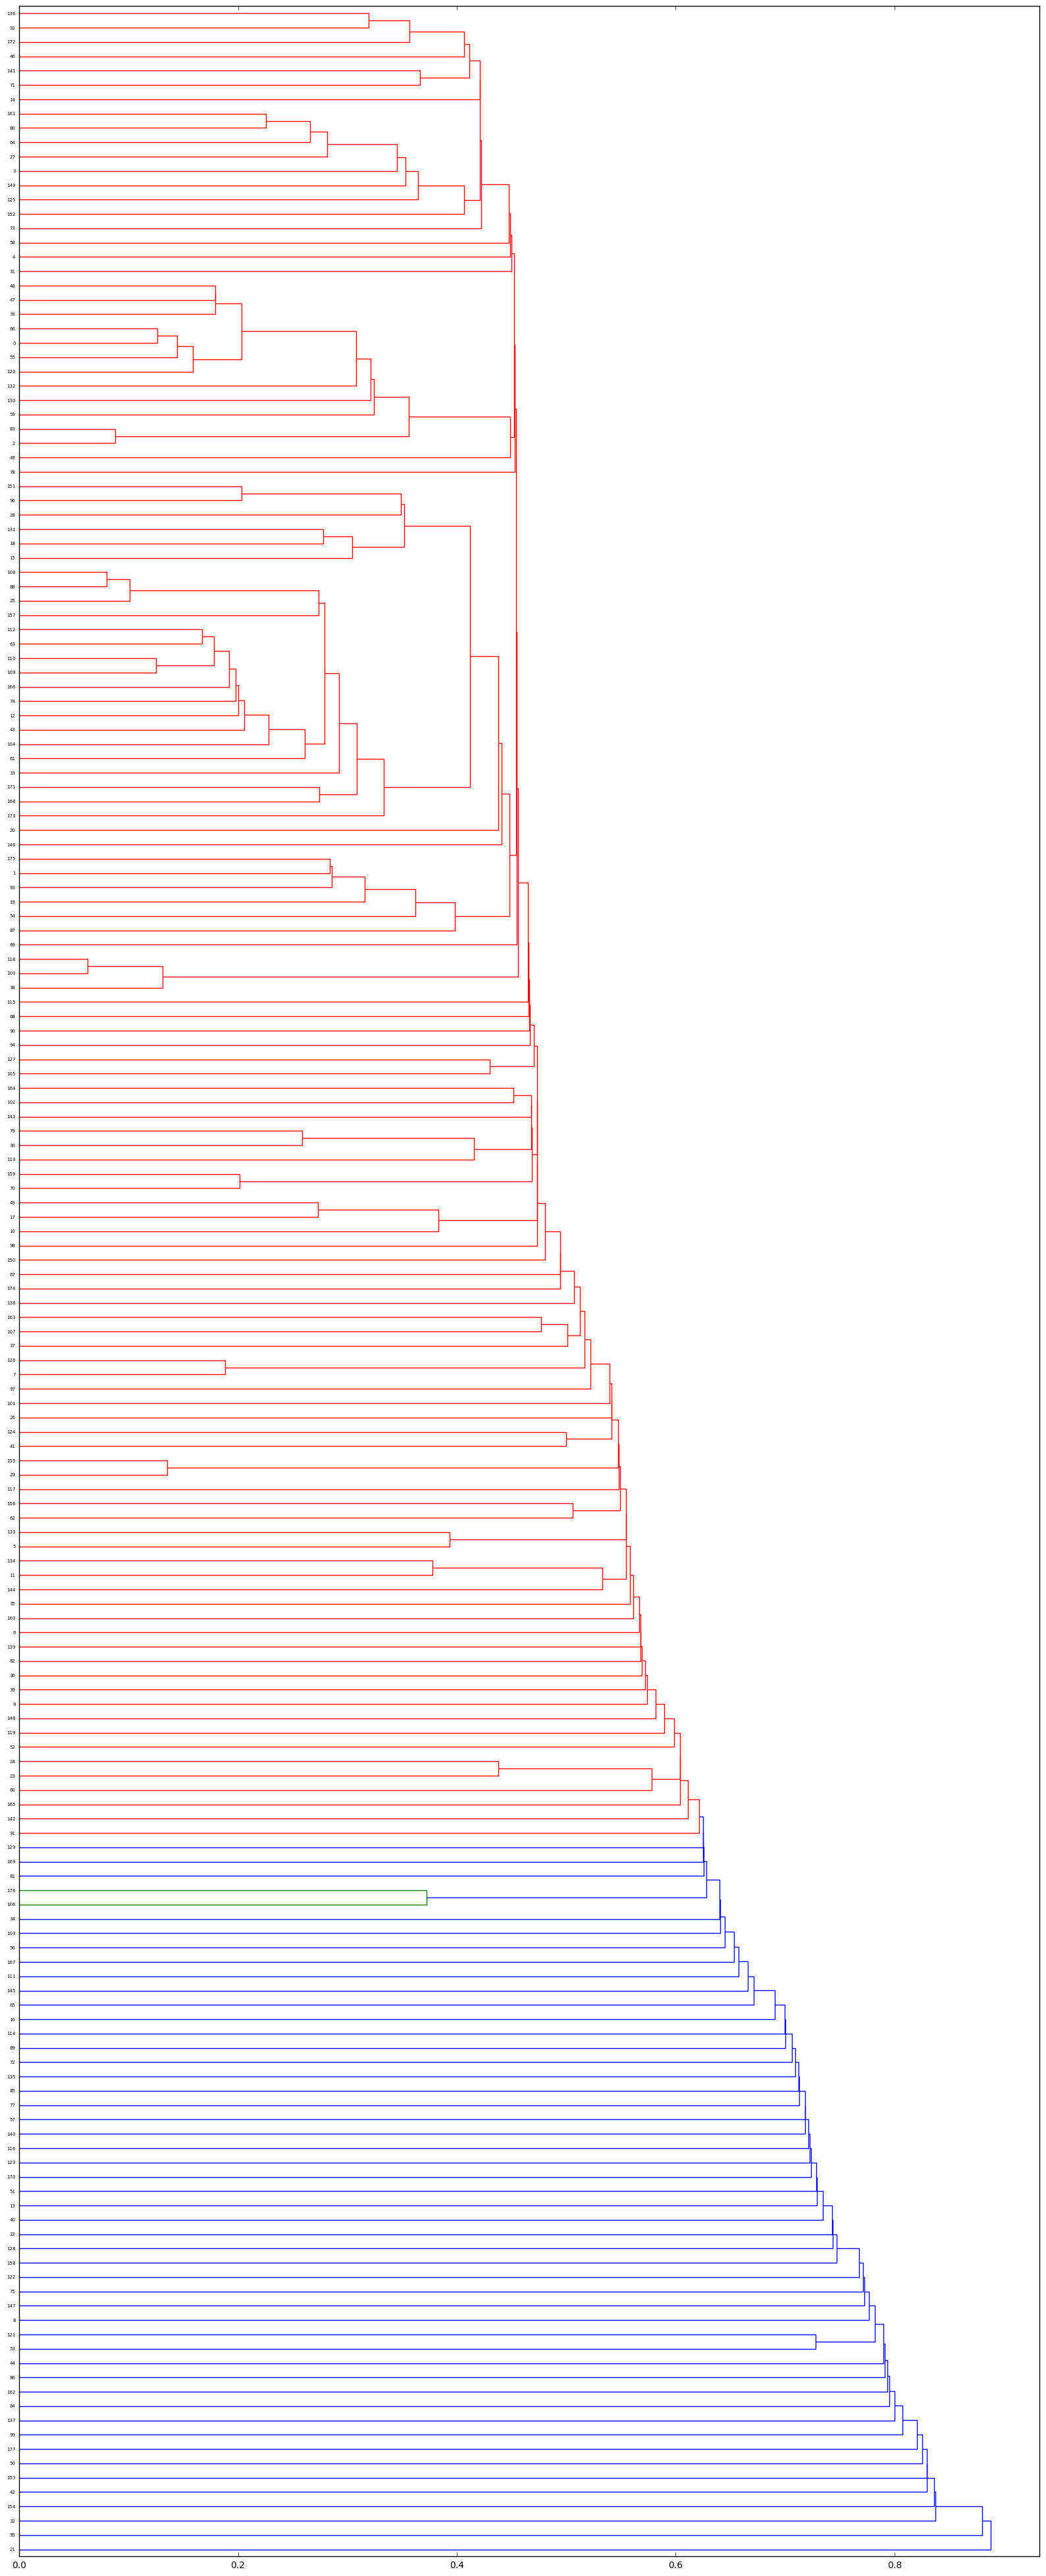

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

#Reconstuct using first 100 singular values
U, s, Vh = sparsesvd(csc_matrix(tf_idf_matrx), k=100)                  
x_matrix = ( np.diag(s)@ Vh).T

#compute the distance 
distance = pdist(x_matrix, metric='cosine')
#calculate the linkage
link = linkage(distance)
plt.figure(figsize=(20,50))
dendrogram(link, orientation='right');

In [24]:
from scipy.spatial.distance import pdist

#import mystery and call the tf_idf function
mystery={'mystery': open('mystery.txt').read()}
myst_tfidf=tf_idf(mystery)

#merge the two datasets
new=tf_idf_matrx.merge(myst_tfidf,left_index=True,right_index=True,how="left")
#delete unnecessary columns
new=new["0_y"]
#change NAs to 0's 
new=new.fillna(0)

#calculate the query vector
v=new.T @ ( U.T @ np.diag(1.0/s))

#use cosine distance function I wrote in previous problem to find the cosine distance between old and new
distances=tf_idf_matrx.columns[np.argsort(Cosine(v,x_matrix ))]

#Print 10 most similar
print("Most similar:")
for i, j in enumerate(distances[-10:]):
    print(i, j)

#Print 10 least similar
print("\n\n Least similar:")
for i, j in enumerate(distances[:10]):
    print(len(docs) - i, j)


Most similar:
0 26
1 7
2 17
3 23
4 9
5 0
6 2
7 3
8 6
9 1


 Least similar:
178 10
177 18
176 25
175 83
174 16
173 60
172 32
171 42
170 20
169 80


Notes on the Pubmed articles
----

These were downloaded with the following script.

```python
from Bio import Entrez, Medline
Entrez.email = "YOUR EMAIL HERE"
import cPickle

try:
    docs = cPickle.load(open('pubmed.pic'))
except Exception, e:
    print e

    docs = {}
    for term in ['plasmodium', 'diabetes', 'asthma', 'cytometry']:
        handle = Entrez.esearch(db="pubmed", term=term, retmax=50)
        result = Entrez.read(handle)
        handle.close()
        idlist = result["IdList"]
        handle2 = Entrez.efetch(db="pubmed", id=idlist, rettype="medline", retmode="text")
        result2 = Medline.parse(handle2)
        for record in result2:
            title = record.get("TI", None)
            abstract = record.get("AB", None)
            if title is None or abstract is None:
                continue
            docs[title] = '\n'.join([title, abstract])
            print title
        handle2.close()
    cPickle.dump(docs, open('pubmed.pic', 'w'))
docs.values()
```